## CNN Image Classification Algorithm

In [122]:
# Initialize random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Let's load the MNIST Dataset

In [123]:
# Let's load the MNIST dataset
from tensorflow.keras.datasets import mnist

# the data will be split between the training and test datasets
(X_train, y_train,), (X_test, y_test) = mnist.load_data()

In [124]:
# X_train and X_test contain gray scale RGB codes from 0 to 255 while
# y_train and y_test contain labels 0 to 9 which represent the numbers

### Let's visualize some numbers using matplotlib

Label: ()


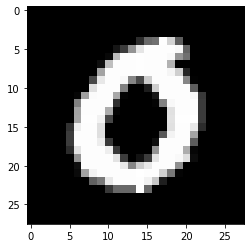

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: ()".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

Label: ()


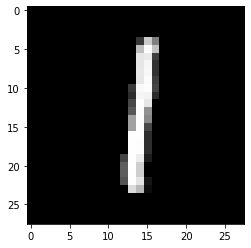

In [126]:
print("Label: ()".format(y_train[5500]))
plt.imshow(X_train[5500], cmap='gray')

Label: ()


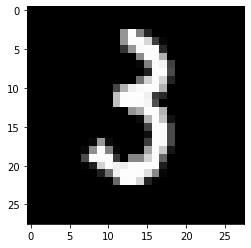

In [127]:
print("Label: ()".format(y_train[1234]))
plt.imshow(X_train[1234], cmap='gray')

In [128]:
# Let's look at the shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [129]:
# There are 60,000 rows of data in the training set and 10,000 rows in the testing set.

### Let's now pre-process the data

In [130]:
# Reshape the training and test data into compatible shapes.
# Sequential model in keras expects data to be in the format(n_e, n_h, n_w, n_c)
# n_e = number of examples
# n_h = height
# n_w = width
# n_c = number of channels
# We will not reshape labels

In [131]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [132]:
# Normalize Data
# Let's normalize the data as required by neural network models
# To scale the data, we will divide it by 255. (i.e. Max RGB value - Min RGB Value)
# Normalize X_train and X_test
# We will need to ensure that the values are float

In [133]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [134]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


In [135]:
# One hot code the class vector.
# Converts the class vectors to binary class matrix
# Converts y_train and y_test
# number of classes = 10
# This is being done to use categorical_crossentropy as loss 

In [136]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Build a CNN Sequential Model

In [137]:
# Initialize the Sequential model 
# Define a Sequential Model ; Add 2 convolutional layers 
# number of filters = 32, kernel size = 3x3
# activation = 'relu'
# input shape = (28,28,1) for the first layer

In [138]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [139]:
model = Sequential()

In [140]:
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

In [141]:
# Flatten the data
# Flatten layers flatten 2D arrays to 1D array before building the fully connected layers
model.add(Flatten())

In [142]:
# Add Dense Layers
# number of neurons in the first layer = 128
# number of neurons in the last layer = number of classes = 10
# acivation function in first layer = relu
# activation function in last layer = softmax

In [143]:
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [144]:
# Let's now compile our model
# loss = categorical_crossentropy
# metrics : accuracy
# optimizer : adam

In [145]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

In [146]:
# Now fit the model
# batch size = 32
# epochs = 10
# given validation data, testing features and labels

### Fit the Model

In [148]:
import time

In [149]:
start = time.time()

In [150]:
#model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

In [151]:
model_info = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 86s 2ms/sample - loss: 0.1338 - accuracy: 0.9593 - val_loss: 0.0601 - val_accuracy: 0.9810
Epoch 2/10
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0559 - val_accuracy: 0.9851
Epoch 3/10
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0523 - val_accuracy: 0.9856
Epoch 4/10
42000/42000 [==============================] - 83s 2ms/sample - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0644 - val_accuracy: 0.9838
Epoch 5/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0694 - val_accuracy: 0.9839
Epoch 6/10
42000/42000 [==============================] - 75s 2ms/sample - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0671 - val_accuracy: 0.9858
Epoch 7/10
42000/42000 [==============================] 

In [152]:
end = time.time()

In [153]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            multiple                  320       
_________________________________________________________________
conv2d_6 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  2359424   
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


### Calculate the loss and accuracy

In [165]:
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

In [166]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [167]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [168]:
model.history

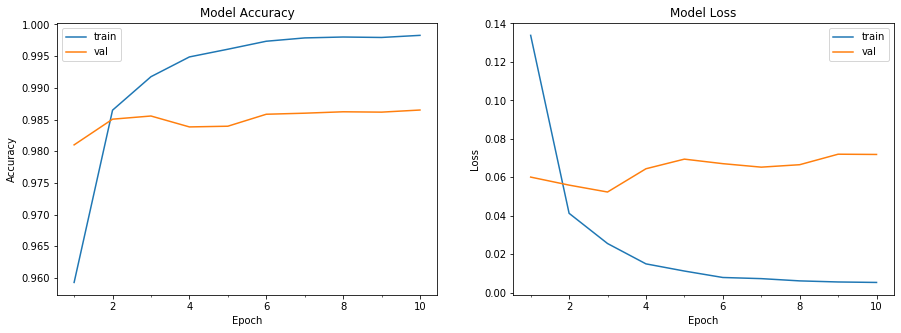

In [169]:
plot_model_history(model_info)

### Predict using the trained model

In [186]:
X_test[2].shape

(28, 28, 1)

1


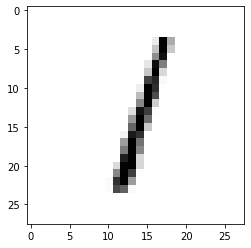

In [187]:
image_index = 2
img_rows = 28
img_cols = 28
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [188]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

0


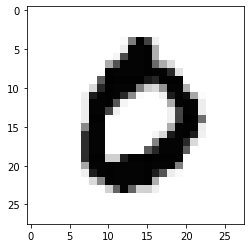

In [189]:
image_index = 3
img_rows = 28
img_cols = 28
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [190]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

4


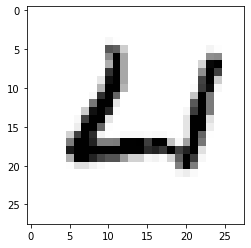

In [191]:
image_index = 33
img_rows = 28
img_cols = 28
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [192]:
y_test[33]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

7


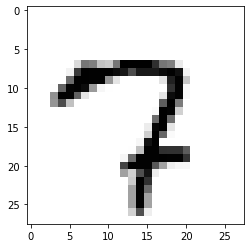

In [193]:
image_index = 36
img_rows = 28
img_cols = 28
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [194]:
y_test[36]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

5


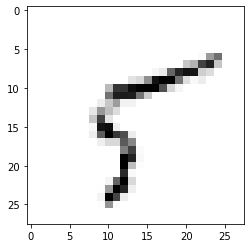

In [195]:
image_index = 59
img_rows = 28
img_cols = 28
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

In [196]:
y_test[59]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)